In [97]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
import selenium

In [95]:
# Define URL 
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'


In [96]:
# Scrape data using pandas read_html function and create dataframe

table = pd.read_html(url, index_col=0)
table

[     terrestrial_date   sol   ls  month  min_temp  pressure
 id                                                         
 2          2012-08-16    10  155      6     -75.0     739.0
 13         2012-08-17    11  156      6     -76.0     740.0
 24         2012-08-18    12  156      6     -76.0     741.0
 35         2012-08-19    13  157      6     -74.0     732.0
 46         2012-08-20    14  157      6     -74.0     740.0
 ...               ...   ...  ...    ...       ...       ...
 1889       2018-02-23  1973  133      5     -78.0     730.0
 1892       2018-02-24  1974  134      5     -77.0     729.0
 1894       2018-02-25  1975  134      5     -76.0     729.0
 1893       2018-02-26  1976  135      5     -77.0     728.0
 1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 6 columns]]

In [19]:
# Because we returned a list, we can convert to a more useful data frame

df = table[0]
df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [22]:
# Inspect the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [24]:
# Lets convert the date object to a datetime type

df.terrestrial_date = pd.to_datetime(df.terrestrial_date)

In [28]:
# Confirm the changes are reflected in the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [34]:
# How many months exist on mars
df.month.nunique()


12

There are 12 unique months on Mars

In [35]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?

df.sol.nunique()

1867

There are 1867 Martian Days worth of data. 

In [39]:
# Identifying the coldest & warmest months

# coldest
avg_min_temp_list = []

# We know there are 12 months, lets iterate through each month's temperature data and then we can print our results

for mth in range(1,13):

    # Find avg minimum temp for each month
    avg_min = df.loc[df.month == mth].min_temp.mean().round(2)

    summary_dict = {
        'month': mth,
        'avg_min_temp': avg_min
    }

    avg_min_temp_list.append(summary_dict)

In [41]:
# Lets print our results. We have a list of dictionaries. 
avg_min_temp_list

[{'month': 1, 'avg_min_temp': -77.16},
 {'month': 2, 'avg_min_temp': -79.93},
 {'month': 3, 'avg_min_temp': -83.31},
 {'month': 4, 'avg_min_temp': -82.75},
 {'month': 5, 'avg_min_temp': -79.31},
 {'month': 6, 'avg_min_temp': -75.3},
 {'month': 7, 'avg_min_temp': -72.28},
 {'month': 8, 'avg_min_temp': -68.38},
 {'month': 9, 'avg_min_temp': -69.17},
 {'month': 10, 'avg_min_temp': -71.98},
 {'month': 11, 'avg_min_temp': -71.99},
 {'month': 12, 'avg_min_temp': -74.45}]

In [52]:
# We can convert this to a dataframe

temp_df = pd.DataFrame(avg_min_temp_list).set_index('month')
temp_df

,avg_min_temp
month,
1,-77.16
2,-79.93
3,-83.31
4,-82.75
5,-79.31
6,-75.30
7,-72.28
8,-68.38
9,-69.17


In [72]:
# Lets identify the coldest month (we can fairly easily see from the table, but lets code it)

temp_df.loc[temp_df.avg_min_temp == temp_df.avg_min_temp.min()]

,avg_min_temp
month,
3,-83.31


The coldest month is the third martian month. 

In [71]:
# Repeating the same procedure we can find the warmest month

temp_df.loc[temp_df.avg_min_temp == temp_df.avg_min_temp.max()]

,avg_min_temp
month,
8,-68.38


Month 8 is the warmest month. 

<BarContainer object of 12 artists>

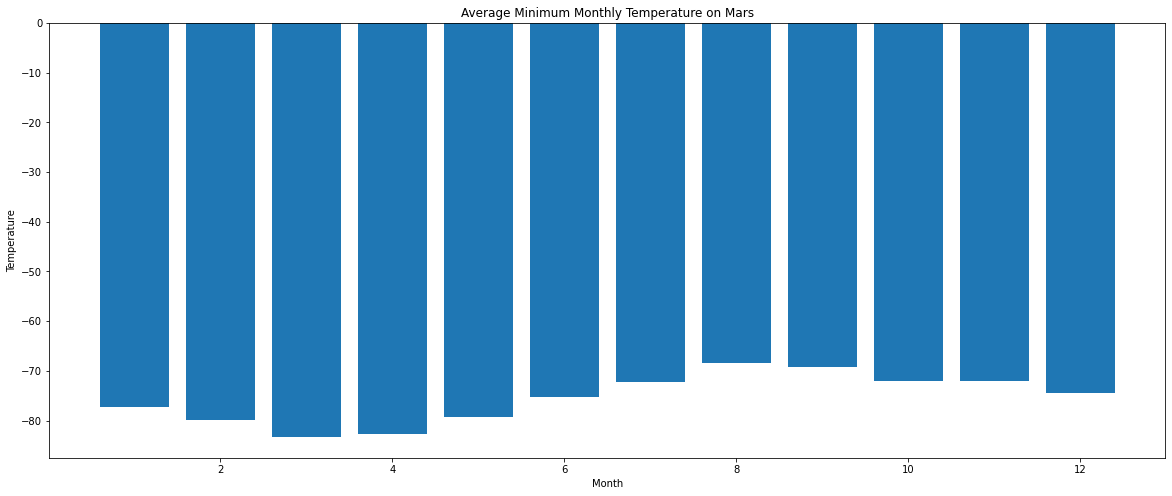

In [63]:
# Plot the results as a bar chart

# Add titles & labels etc
plt.figure(figsize=(20,8))
plt.title('Average Minimum Monthly Temperature on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature')


plt.bar(temp_df.index, temp_df.avg_min_temp)



In [67]:
# Calculating the months with the highest & lowest atmospheric pressure

avg_ap_list = []

# Iterate through the dataframe by month
for mth in range(1,13):

    # Calculate avg atmospheric pressure
    avg_ap = df.loc[df.month == mth].pressure.mean()

    # Write to a dictionary
    sum_dict = {
        'month': mth,
        'avg_ap': avg_ap
    }

    avg_ap_list.append(sum_dict)

# Convert our list of dictionaries to a dataframe

ap_df = pd.DataFrame(avg_ap_list).set_index('month')

In [68]:
ap_df

,avg_ap
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [70]:
# Identify highest month

ap_df.loc[ap_df.avg_ap == ap_df.avg_ap.max()]

,avg_ap
month,
9,913.30597


Month 9 has the highest average atmospheric pressure

In [73]:
# Identify lowest month

ap_df.loc[ap_df.avg_ap == ap_df.avg_ap.min()]

,avg_ap
month,
6,745.054422


Month 6 has the lowest average atmospheric pressure

<BarContainer object of 12 artists>

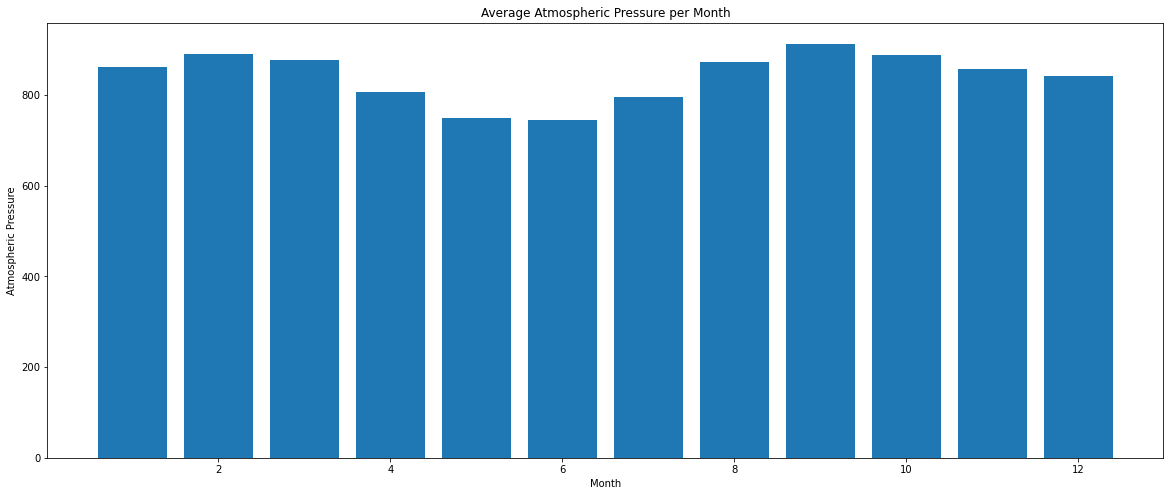

In [74]:
# Plot the atmospheric pressure results

plt.figure(figsize=(20,8))
plt.title('Average Atmospheric Pressure per Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')


plt.bar(ap_df.index, ap_df.avg_ap)

In [75]:
# About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth?


# There are several ways I can think of how to find an estimate of the number of days in a martian year. 

# First we can identify the number of days that it takes for the sun to return to the same longitutinal position. 
# Second we can look at the number of days that pass between the minimum temperatures each year across the data set and take an average

# Lets first try the comparing the longitudinal positions, that seems like the easiest approach. 

# Quick print of the original df, so I can stop scrolling back up
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [79]:
# We can probably use the first ls value and iterate through to find all of the same values

start_ls = df.loc[df.ls == df.ls.loc[0]]
start_ls

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [82]:
# From the index we can see the number of days elapsed between each return to the same ls value (0->598, 599->1249)

days = ((df.terrestrial_date[598] - df.terrestrial_date[0]) + (df.terrestrial_date[1249] - df.terrestrial_date[599]))/2
days

Timedelta('686 days 00:00:00')

There are roughly 686 earth days in each Martian year

<BarContainer object of 1867 artists>

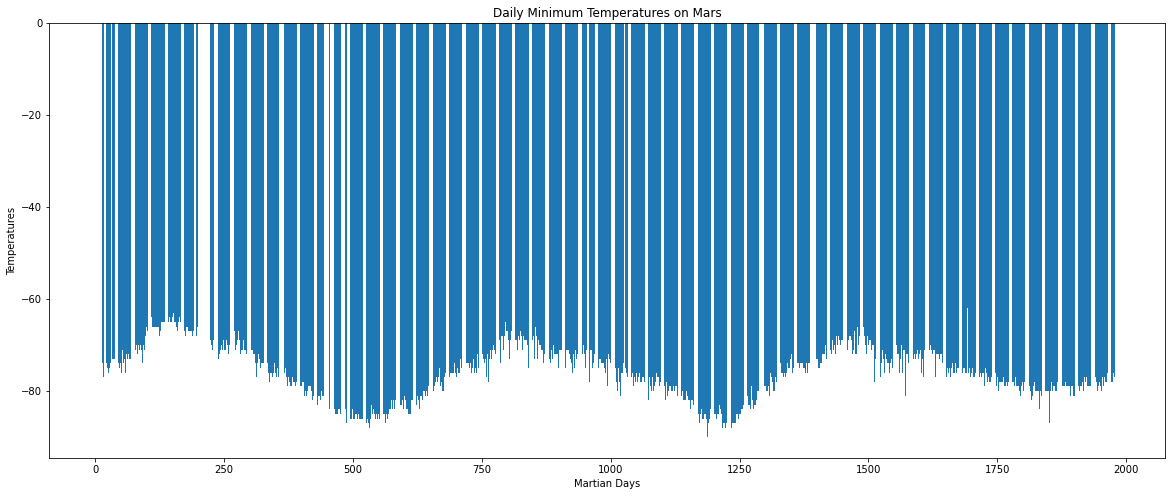

In [89]:
# Lets plot the temperatures to visually inspect our estimate from above. 

plt.figure(figsize=(20,8))
plt.title('Daily Minimum Temperatures on Mars')
plt.xlabel('Martian Days')
plt.ylabel('Temperatures')

plt.bar(df.sol, df.min_temp)
    

In [93]:
# We have 1867 observed Martian days - from the graph it looks like we observe 3 cycles. 

len(df.sol)/3

622.3333333333334

Our rough visual estimate is 622 days. Within 25% of our original calculation. 

In [99]:
# Export dataframe to a csv

df.to_csv('mars_data.csv', index=False)